## House sales in King County

### Introduction

This example illustrates **linear regression** in R. I develop a model for house sale prices in King County (Washington), which includes Seattle. It is the most populous county in Washington (population 1,931,249 in the 2010 census), and the 13th-most populous in the United States. The data include homes sold between May 2014 and May 2015.

The data set contains 15 house features plus the price and the id columns, along with 21,613 observations. The variables included in the data set are:

* `id`, an identifier.

* `date`, the date when the sale took place.

* `price`, the sale price.

* `bedrooms`, the number of bedrooms.

* `bathrooms`, the number of bathrooms

* `sqft_living`, the square footage of the home.

* `sqft_lot`, the square footage of the lot.

* `floors`, the total floors (levels) in house.

* `waterfront`, a dummy for having a view to the waterfront.

* `condition`, a 1-5 rating.

* `sqft_above`, the square footage of the basement.

* `yr_built`, the year when the house was built.

* `yr_renovated`, the year when the house was renovated.

* `zipcode`, the ZIP code of the house.

* `lat`, the latitude of the house.

* `long`, the longitude of the house.

### Importing the data

I import the data from a csv file, using here the option `stringsAsFactors=FALSE`. The column `date` is then imported as a character vector, not as factor, which is the default. This is irrelevant for the actual analysis presented here.


In [1]:
king = read.csv(file='https://raw.githubusercontent.com/mcanela-iese/DataSci_MVD/master/Data/king.csv',
    stringsAsFactors=FALSE)
print(dim(king))

[1] 21613    17


Actually, `king` is a data frame, with 21,613 rows and 17 columns. The first column has many **duplicates**, which are duplicates for the data frame. This means that the same house may have been sold more than once during the period covered by the data.

In [2]:
print(sum(duplicated(king[, 'id'])))
print(sum(duplicated(king)))

[1] 177
[1] 0


With the function `str`, we take a look at the columns of this data frame.

In [3]:
str(king)

'data.frame':	21613 obs. of  17 variables:
 $ id           : num  7.13e+09 6.41e+09 5.63e+09 2.49e+09 1.95e+09 ...
 $ date         : chr  "20141013T000000" "20141209T000000" "20150225T000000" "20141209T000000" ...
 $ zipcode      : int  98178 98125 98028 98136 98074 98053 98003 98198 98146 98038 ...
 $ lat          : num  47.5 47.7 47.7 47.5 47.6 ...
 $ long         : num  -122 -122 -122 -122 -122 ...
 $ bedrooms     : int  3 3 2 4 3 4 3 3 3 3 ...
 $ bathrooms    : num  1 2.25 1 3 2 4.5 2.25 1.5 1 2.5 ...
 $ sqft_living  : int  1180 2570 770 1960 1680 5420 1715 1060 1780 1890 ...
 $ sqft_above   : int  1180 2170 770 1050 1680 3890 1715 1060 1050 1890 ...
 $ sqft_basement: int  0 400 0 910 0 1530 0 0 730 0 ...
 $ sqft_lot     : int  5650 7242 10000 5000 8080 101930 6819 9711 7470 6560 ...
 $ floors       : num  1 2 1 1 1 1 2 1 1 2 ...
 $ waterfront   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ condition    : int  3 3 3 5 3 3 3 3 3 3 ...
 $ yr_built     : int  1955 1951 1933 1965 1987 2001 1995 19

Note the format of `date`. '20140502T000000' must be read as '2014-05-02 00:00:00'. This is the **datetime format**. The 'T' indicates the beginning of the time part. Since '20140502T000000' contains one non-numeric character, it is imported as a string. 

A summary of the data helps. I use the function `summary`, omitting `id`, `zipcode` and `date`, which do not make sense. Also, note that, for a dummy like `waterfront`, the mean is just the proportion of 1's. So, 0.75% of the houses have a view to the waterfront. The rest is easy.


In [4]:
summary(king[, -(1:3)])

      lat             long           bedrooms        bathrooms    
 Min.   :47.16   Min.   :-122.5   Min.   : 0.000   Min.   :0.000  
 1st Qu.:47.47   1st Qu.:-122.3   1st Qu.: 3.000   1st Qu.:1.750  
 Median :47.57   Median :-122.2   Median : 3.000   Median :2.250  
 Mean   :47.56   Mean   :-122.2   Mean   : 3.371   Mean   :2.115  
 3rd Qu.:47.68   3rd Qu.:-122.1   3rd Qu.: 4.000   3rd Qu.:2.500  
 Max.   :47.78   Max.   :-121.3   Max.   :33.000   Max.   :8.000  
  sqft_living      sqft_above   sqft_basement       sqft_lot      
 Min.   :  290   Min.   : 290   Min.   :   0.0   Min.   :    520  
 1st Qu.: 1427   1st Qu.:1190   1st Qu.:   0.0   1st Qu.:   5040  
 Median : 1910   Median :1560   Median :   0.0   Median :   7618  
 Mean   : 2080   Mean   :1788   Mean   : 291.5   Mean   :  15107  
 3rd Qu.: 2550   3rd Qu.:2210   3rd Qu.: 560.0   3rd Qu.:  10688  
 Max.   :13540   Max.   :9410   Max.   :4820.0   Max.   :1651359  
     floors        waterfront         condition        yr_buil

### Linear regression model

A linear regression model can be obtained with the function `lm`. The key arguments are `formula` and `data`. The formula is an expression which, in this case, has an obvious meaning. The syntax is `y ~ x1 + x2 + ...`

In [5]:
fm = price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors +
    waterfront + condition + sqft_above + yr_built + yr_renovated + lat + long

The argument `data` may be skipped, but then you have to specify, for each variable, the data frame from where that variable is taken. 

In [6]:
mod = lm(formula=fm, data=king)

As an R object, `mod` is a **list**. If you are interested in the structure of an R object, you can explore it with the function `names`, or (at your own risk) with `str`, which provides a lot of information but can give you too much output for complex objects. For an `lm` model, `names` is enough for learning what the model contains.

In [7]:
print(names(mod))

 [1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"        


In most models, the function `summary` provides useful information. For a linear regression model, it includes the **regression coefficients**, with the corresponding **p-values**, and the **R-squared** statistic, whose square root, R = 0.804, is the correlation between actual and predicted prices. 

The function `summary` also provides a summary of the residuals. The maximum and minimum have less interest, but the **median** (50% percentile), and the first and third **quartiles** (25 and 75% percentiles, respectively) can be useful. Note that most terms of the equation are significant, as could be expected with such sample size. This is typical of big data sets, and not much attention is paid to significance in this context.

In [8]:
summary(mod)


Call:
lm(formula = fm, data = king)

Residuals:
     Min       1Q   Median       3Q      Max 
-1561603  -110101   -12300    84087  3922773 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -5.038e+07  1.656e+06 -30.422  < 2e-16 ***
bedrooms     -5.244e+04  2.020e+03 -25.964  < 2e-16 ***
bathrooms     5.648e+04  3.518e+03  16.057  < 2e-16 ***
sqft_living   2.373e+02  4.388e+00  54.082  < 2e-16 ***
sqft_lot     -3.205e-02  3.764e-02  -0.851   0.3945    
floors        9.801e+03  3.848e+03   2.547   0.0109 *  
waterfront    7.585e+05  1.746e+04  43.453  < 2e-16 ***
condition     3.332e+04  2.535e+03  13.145  < 2e-16 ***
sqft_above    6.303e+01  4.551e+00  13.849  < 2e-16 ***
yr_built     -1.788e+03  7.587e+01 -23.567  < 2e-16 ***
yr_renovated  2.686e+01  3.959e+00   6.783 1.21e-11 ***
lat           6.420e+05  1.117e+04  57.496  < 2e-16 ***
long         -1.900e+05  1.247e+04 -15.239  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1

The predicted values of a linear regression model are actually contained in the model (the element `fitted.values`), but I use here the function `predict` in order to apply the same steps as with other models. `predict` can be applied to a new data set, as far as it contains all the variables included on the right side of the formula of the model. 

In [9]:
pred_price = predict(object=mod, newdata=king)

The regression residuals are also contained in the model (the element `residuals`), but they can be derived from the predicted values.

In [10]:
pred_error = king[, 'price'] - pred_price

### Graphics
Although the price has a (very) **skewed distribution**, that of the prediction error is reasonably symmetric, as shown in the exhibit below.

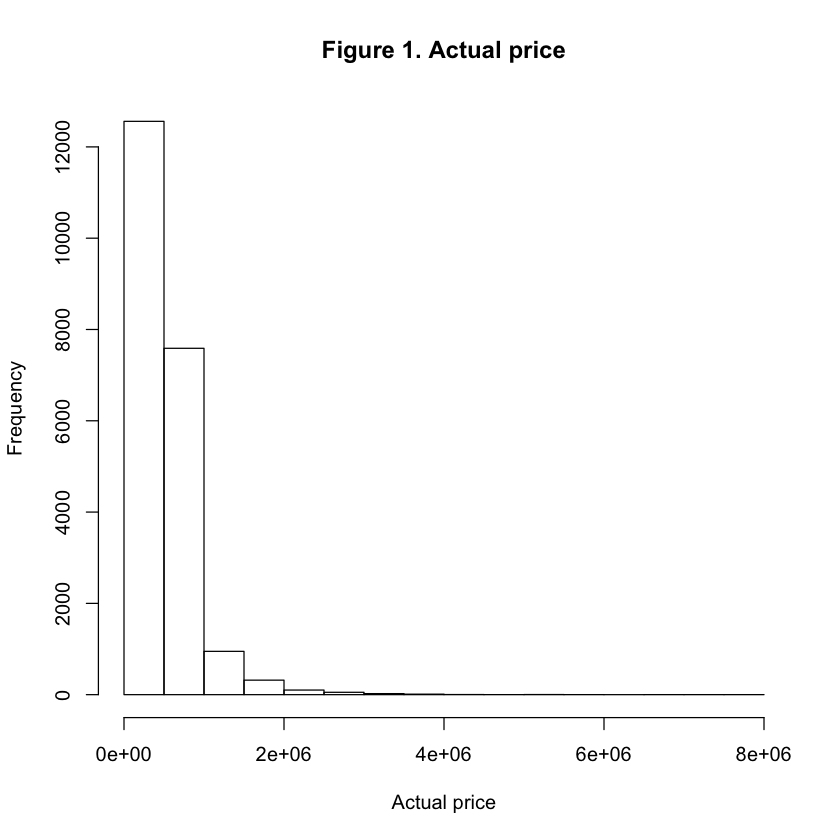

In [11]:
hist(king[, 'price'], main='Figure 1. Actual price', xlab='Actual price')

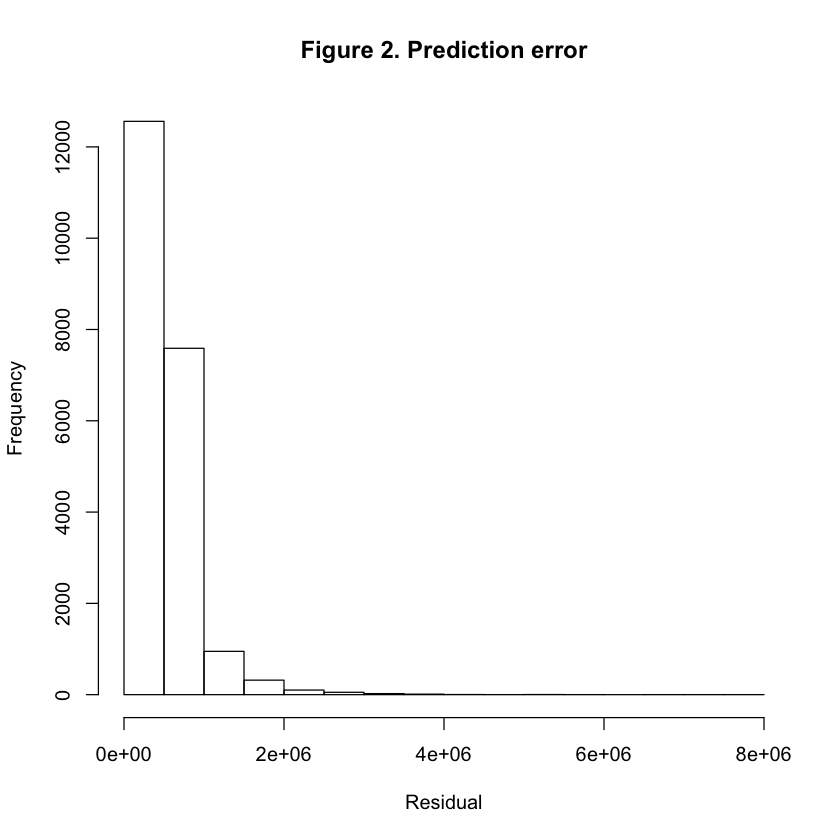

In [12]:
hist(king[, 'price'], main='Figure 2. Prediction error', xlab='Residual')

Scatter plots with the predicted values in the horizontal axis and either the actual values or the prediction errors in the vertical axis are useful to detect problems in the models fitted. I leave the discussion of this plot for the homework.

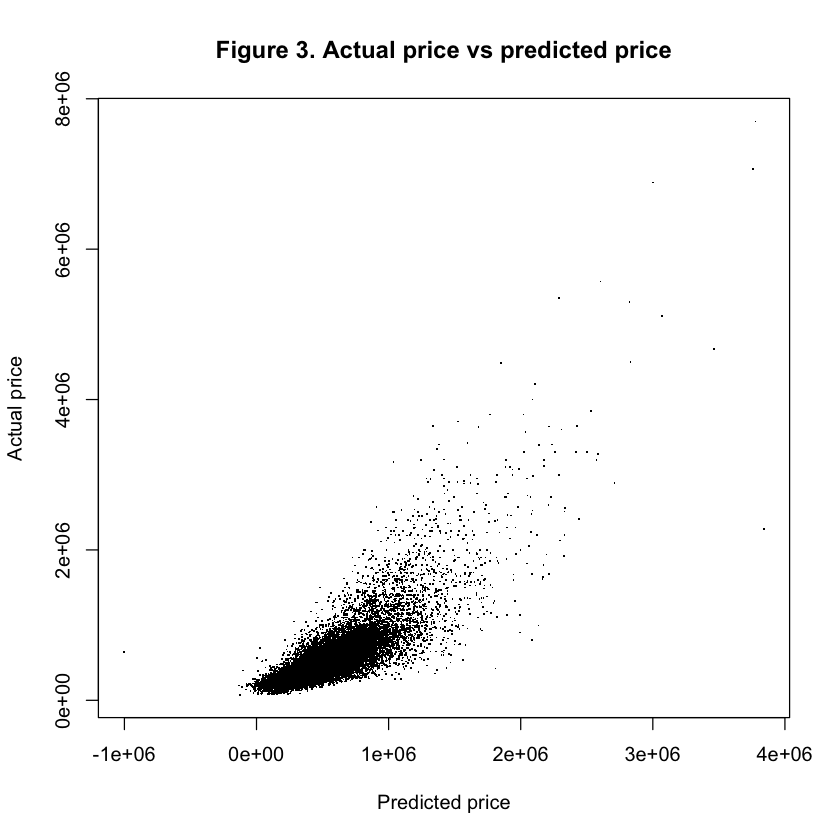

In [13]:
plot(king[, 'price'] ~ pred_price, pch='.', main='Figure 3. Actual price vs predicted price',
     xlab='Predicted price', ylab='Actual price')

### Continuation

Figure 1 shows that prices have a very skewed distribution. There is nothing wrong in that, typically housing price data sets cover a wide range of sizes and prices (e.g. a house with 33 bedrooms in this data set), and the big expensive houses are much less frequent than the small unexpensive ones. But, as Figure 3 shows, a linear regression equation fitted to such a data set comes with some problems attached. The most obvious of these problems is that  predicted prices can be negative.

To continue the analysis, you can explore various approaches:

* Transformations, such the square root or the logarithm, are recommended in Statistics textbooks in many situations. In particular, the **log transformation**, is used with variables with skewed distributions, to limit the influence of **extreme values**. Develop a model for predicting the price which is based on a linear regression equation that has the logarithm of the price on the left side. Do you get better predictions  with this model?

* It can be argued that having a model based on a linear equation does not make sense on such a wide range of prices. Indeed, in order to cope with the expensive houses, we are spoiling the prediction for some of the nonexpensive houses. So, we could **trim the data set**, dropping the houses that exceed a certain theshold of price and/or size. What do you suggest? 

* The ZIP code has not been used in the analysis. How would you introduce it? Would it be more useful than the longitude and the latitude?

* Time effects (trend/seasonality) have not been considered in the analysis. How would you explore that in these data?